# <b>Unsupervised Learning Week: Clustering</b>

**Goals**

- Clustering. What is it? Why is it used? What makes it qualify as unsupervised learning.
- KMeans: The most popular clustering algorithm. How to use KMeans with Sklearn. 
- How to evaluate KMeans using Sklearn.
- In class workshop: pick a dataset and do some clustering!!

## What is clustering? What is unsupervised learning?

## Clustering

Clustering comes natural to humans. We categorize each others, things, and other phenomenon all the time i.e. Millennials vs Generation X vs Boomers and Tudor vs Hacienda vs Contemporary houses. Categorizing helps us better understand things; if you tell me a certain person or thing belongs to a certain label, then I immediately gain a better understanding of their or its purpose.
<br><br>
What do you think are real world applications of clustering? Why would this be valuable to a business?
<br><br>
"Clustering is a technique for finding similarity groups in a data, called clusters. It attempts to group individuals in a population together by similarity, but not driven by a specific purpose." http://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/
<br><br>
<b>CLUSTERING IS UNSUPERVISED LEARNING BECAUSE THERE ARE NO LABELS LIKE IN SUPERVISED LEARNING. THE POINT OF CLUSTERING IS TO GENERATE NEW LABELS FROM UNLABELLED DATA<b>

In [2]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [3]:
#Make fake data to visualize
data = make_blobs(n_samples=250, centers = 4, cluster_std=.75, random_state=4)[0]

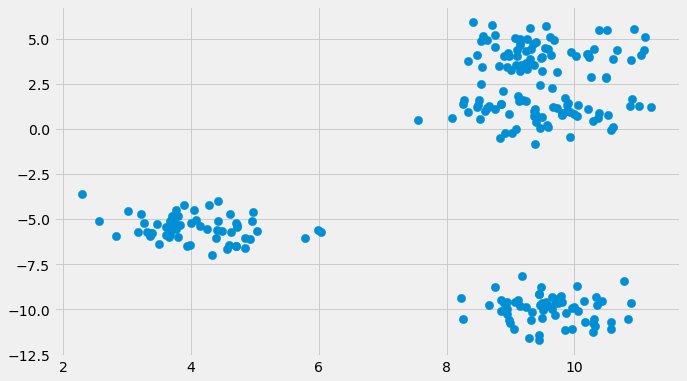

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68);

### How many clusters do you see?

Clustering is usually never this easy. Let's look at some more difficult data.

In [7]:
#Make fake data
data = make_classification(n_samples=400, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=1)[0]

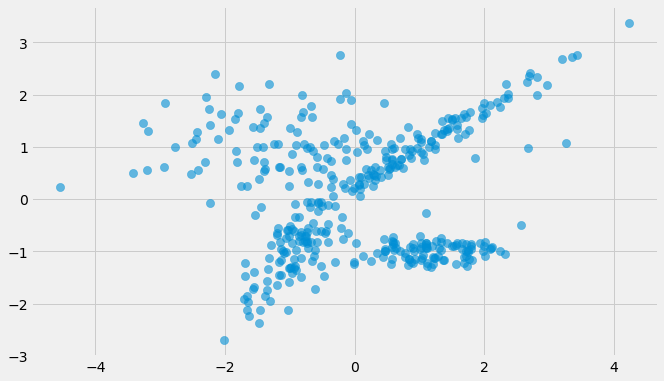

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

## KMeans Algorithm

- The most popular clustering algorithm
- K in Kmeans stands for the number of clusters and centriods predetermined by you the data scientist.
- Centriods are the center point of each cluster. The average of all of the points in the cluster, hence the means in kmeans.
- A point is assigned to the cluster of the centriod it is closest to.
- Algorithms works by randomly assigning centriods within the data and shifts the centriods until they reach convergence.
- Basically means the algorithm keeps going until it finds the smallest value produced by this function:
$$∑(x¯c−xi)^2$$
<br><br>
### KMeans in action

![a](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

Interactive version:

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

**Things to keep in mind**

- Needs features on the same or similar scales to be effective. 

- Vulnerable to noise from too many features and multicollinearity.

- Assumes a linear boundary between clusters, which is not always the case as we're about to see.

### Clustering Time

We're going to use KMeans to cluster different forms of data to demonstrate how abilities and limitations of KMeans.

Let's bring back the blobs and use KMeans on it.

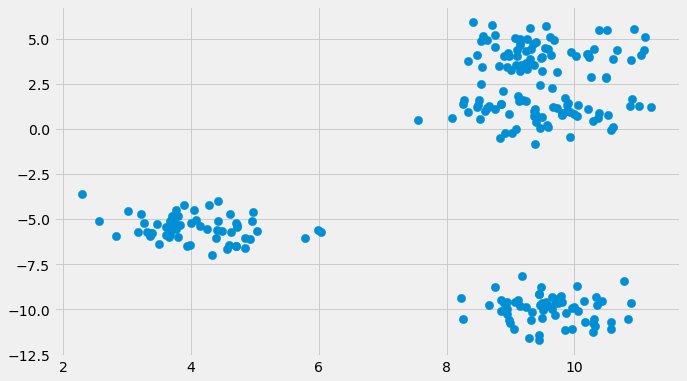

In [8]:
#Make fake data to visualize
data = make_blobs(n_samples=250, centers = 4, cluster_std=.75, random_state=4)[0]

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68);

In [11]:
data

array([[  8.93999835,  -9.9656743 ],
       [  3.70549331,  -4.85136277],
       [  9.24125248,   4.33342728],
       [ 10.25296203,   2.89101605],
       [  9.81219988,  -9.57187486],
       [  9.13344426,   1.54202891],
       [  8.88543132,   2.10487948],
       [  9.40154461,   0.76425185],
       [ 10.48750187,   2.84897336],
       [  3.39067342,  -5.7635189 ],
       [  9.39370258,   4.78366263],
       [  9.45214695,  -9.12078241],
       [ 10.2950521 , -10.773056  ],
       [  8.75012798,  -8.73885485],
       [  3.82563825,  -5.32173705],
       [  9.87930257,   1.33206471],
       [  4.62833826,  -5.69293725],
       [  8.4737832 ,   4.06316669],
       [ 10.30511699, -10.51734201],
       [  4.41120441,  -5.60505584],
       [  9.62037601,   5.08652018],
       [  3.77167791,  -4.48038961],
       [  9.34475215,   4.67737485],
       [  8.33179793,   3.77477219],
       [  4.08121611,  -5.06904652],
       [  9.24061242,  -9.89182482],
       [  9.15153486,   4.63974954],
 

In [21]:
#Intialize the KMeans algorithm with 3 clusters
km3 = KMeans(n_clusters=3)


#Fit model on data
km3.fit(data)

#Get the labels

labels = km3.labels_

labels


array([2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0])

In [22]:
#Can derive labels this way as well, using .predict

km3.predict(data)[:10]


array([2, 0, 1, 1, 2, 1, 1, 1, 1, 0])

In [23]:
#The counts of labels
pd.value_counts(labels)

1    126
2     62
0     62
dtype: int64

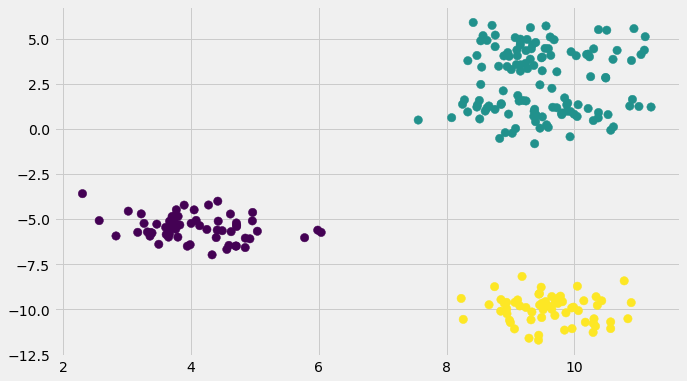

In [24]:
#Visualize the data with the color-encoded labels

plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], s = 70, c = labels)

Is this what you expected?


Centriods: The center point of each cluster. Equivalent to the average of the attributes for each label

Let's replot the above chart but with the centriods.

In [25]:
#Centriod values

centriods = km3.cluster_centers_

centriods


array([[ 4.07638897, -5.47320984],
       [ 9.47719408,  2.61510626],
       [ 9.61095813, -9.97869912]])

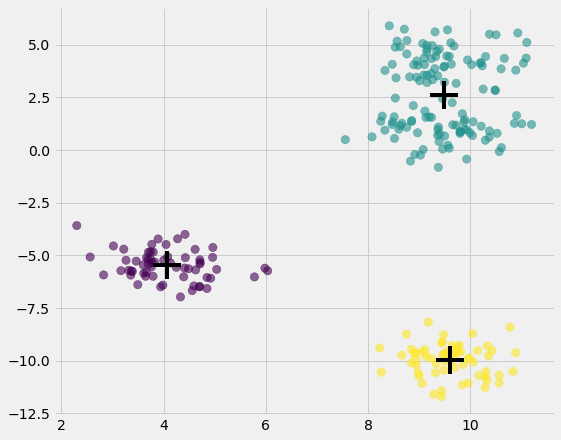

In [26]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(8,7))
plt.scatter(data[:, 0], data[:, 1], s = 70, c=labels, alpha=.6)
plt.scatter(centriods[:, 0], centriods[:, 1], s = 800, marker= "+", c = "black");

Let's try it again with four clusters

In [27]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(data)

#Get the labels

labels = km4.labels_

labels


array([1, 2, 3, 3, 1, 0, 0, 0, 3, 2, 3, 1, 1, 1, 2, 0, 2, 3, 1, 2, 3, 2, 3,
       3, 2, 1, 3, 2, 0, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 3, 3, 1, 3, 0, 1, 0,
       3, 1, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 3, 2, 0, 3, 3, 2, 3, 1, 3, 1, 1,
       3, 2, 1, 0, 2, 1, 0, 2, 1, 1, 3, 0, 2, 3, 1, 0, 1, 0, 2, 2, 3, 0, 0,
       3, 2, 0, 1, 3, 3, 1, 0, 3, 0, 1, 3, 2, 2, 3, 3, 3, 0, 0, 2, 1, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 3, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 3, 3, 1, 2, 2, 2, 1, 0, 3, 2, 0, 2, 3, 3, 0, 2, 3, 3, 2,
       2, 2, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 1, 0, 2, 2, 0, 1, 3, 1, 3, 3, 0,
       1, 1, 2, 0, 3, 3, 2, 3, 2, 2, 3, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 0,
       2, 0, 2, 3, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 2, 0, 1, 1, 1, 3, 0,
       2, 2, 1, 1, 1, 0, 2, 1, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 3, 2])

In [28]:
#The counts of labels
pd.value_counts(labels)

3    63
0    63
2    62
1    62
dtype: int64

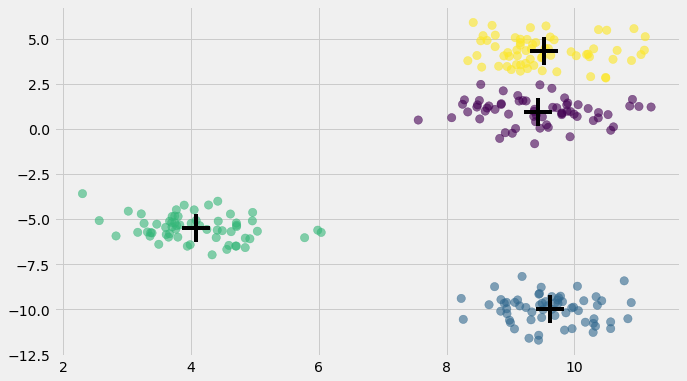

In [29]:
#Visualization
centriods = km4.cluster_centers_


plt.figure(figsize=(10, 6))
plt.scatter(data[:,0], data[:,1], s = 70, c = labels, alpha=.6)
plt.scatter(centriods[:, 0], centriods[:, 1], s = 800, marker= "+", c = "black");

Does this change your answer to the "How many clusters do you see?" question.

Cluster the random data from earlier

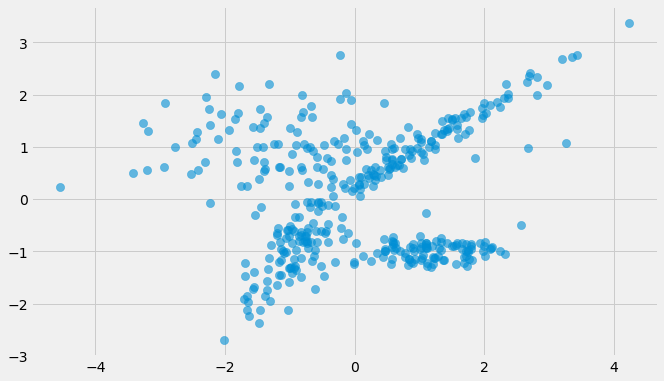

In [30]:
#Make fake data
data = make_classification(n_samples=400, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=1)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

What cluster value should we set?

In [35]:
#Intialize the KMeans algorithm with 4 clusters

km = KMeans(n_clusters=4)

#Fit model on data
km.fit(data)

#Get the labels

labels = km.labels_

#Assign centriods

cents = km.cluster_centers_

#Values counts of labels
pd.value_counts(labels)

0    118
1    117
2     92
3     73
dtype: int64

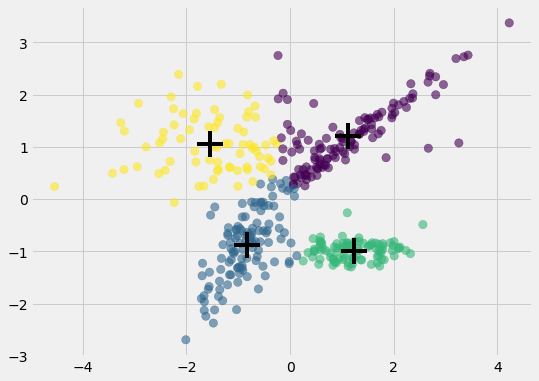

In [36]:
#Visualize color-encoded data

plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c = labels, s = 70, alpha=.6)
plt.scatter(cents[:, 0], cents[:, 1], c = "black", marker="+", s = 700)

Is this what you expected?

Let's try this on "moons" data.

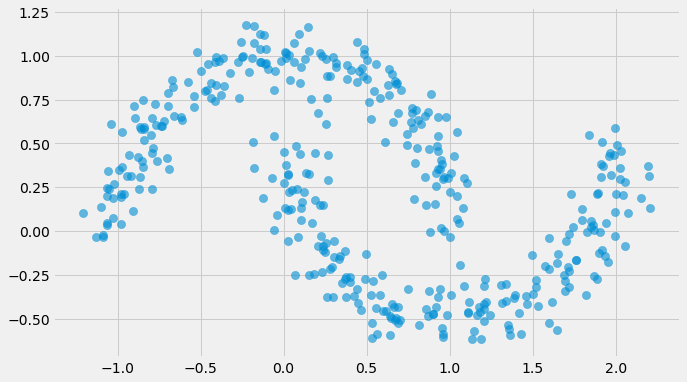

In [38]:
#Make moon data

data = make_moons(n_samples=400, noise=.10)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

Cluster with 2 clusters

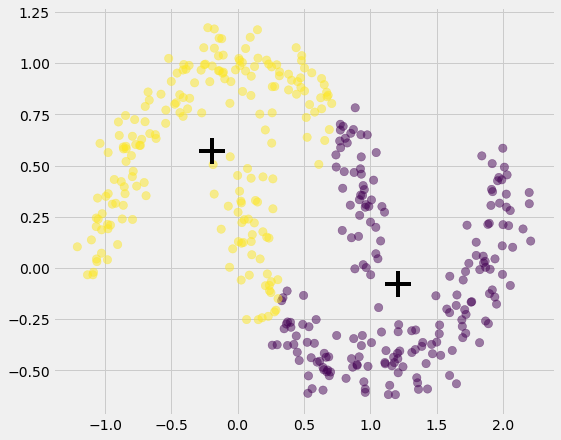

In [40]:
#Intialize the KMeans algorithm with 2 clusters

km2 = KMeans(n_clusters=2)

#Fit model on data
km2.fit(data)

#Get the labels

labels = km2.labels_

#Centriods
cents = km2.cluster_centers_



#Visualize color-encoded data
plt.figure(figsize=(8, 7))
plt.scatter(data[:, 0], data[:, 1], c= labels, s = 70, alpha=.5)
plt.scatter(cents[:, 0], cents[:, 1], c = "black", marker= "+", s = 700)

How do you rate the results of this clustering algorithm?

Let's use KMeans on "circles"

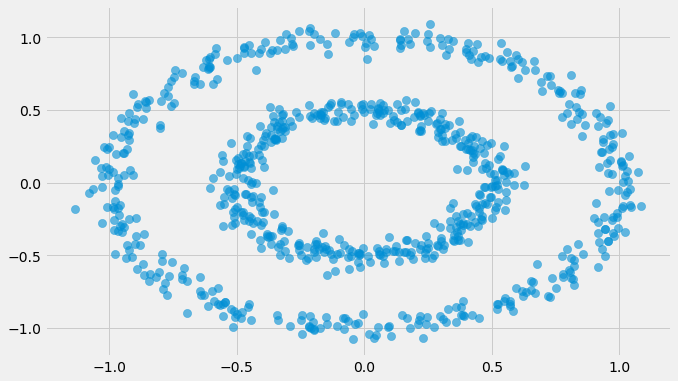

In [41]:
#Make circles data

data = make_circles(n_samples=800, noise=.05, factor=0.5)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

How do you think this data will interact with KMeans?

Let's find out.

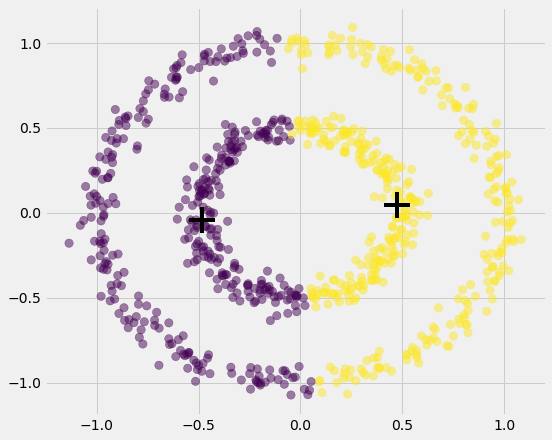

In [44]:
#Intialize the KMeans algorithm with 2 clusters

km2 = KMeans(n_clusters=2)

#Fit model on data
km2.fit(data)

#Get the labels

labels = km2.labels_

#Centriods
cents = km2.cluster_centers_






#Visualize color-encoded data
plt.figure(figsize=(8, 7))
plt.scatter(data[:, 0], data[:, 1], c = labels, s = 70, alpha=.5)
plt.scatter(cents[:, 0], cents[:, 1], c = "black", marker="+", s = 700)

Does this match your expectation?

KMeans is great but not it's not perfect, there's other algorithm that are better clustering the the types of data KMean is not good at clustering.

<br>

Now let's use KMeans on real world data.

## Clustering Country Data

<br>

- In this section we're going to use KMeans to cluster countries based on their socio-economic attributes such as unemployment, electricity, and infant mortality.

- How to evaluate clusters using the elbow method and silhouette score

- Scaling features improves results

In [45]:

path = "../../data/country_development_data.pkl"

#Load in data and assign it to df
df = pd.read_pickle(path)

#Look at first five rows
df.head()

IndicatorCode,Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"Commercial bank branches (per 100,000 adults)",Depth of credit information index (0=low to 8=high),Strength of legal rights index (0=weak to 12=strong),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),GDP per capita (current US$),Proportion of seats held by women in national parliaments (%),...,Health expenditure per capita (current US$),"Labor force, female (% of total labor force)","Unemployment, total (% of total labor force)",Net migration,"Mortality rate, infant (per 1,000 live births)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Population, ages 0-14 (% of total)","Age dependency ratio, young (% of working-age population)",Urban population (% of total)
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.0,0.000000,0.425262,2.465221,0.0,9.0,74.882842,6.39,633.569247,27.710843,...,54.964148,16.051439,9.1,473007,66.3,60.028268,60.48056,44.870996,85.153384,26.282
Albania,100.0,100.000000,1.607038,22.241690,6.0,7.0,105.469966,60.10,4564.390339,20.714286,...,239.577092,41.266475,16.1,-91750,12.5,77.537244,90.56197,18.930427,27.432462,56.409
Algeria,100.0,1.083680,3.316038,5.064181,0.0,2.0,93.310750,18.09,5484.066806,31.601732,...,313.520212,17.376156,9.5,-143268,21.9,74.568951,85.02157,28.205909,42.742285,70.129
Angola,37.0,70.906823,1.354008,12.863257,0.0,1.0,63.479208,21.26,5900.529570,36.818182,...,267.224299,46.204554,6.8,102322,96.0,51.866171,49.09112,47.850317,96.005760,43.274
Argentina,99.8,23.769069,4.562049,13.303817,8.0,2.0,158.735762,64.70,12509.531118,36.186770,...,1074.066944,40.431360,8.2,30000,11.1,75.986098,87.23494,25.346427,39.700196,91.604


In [ ]:
#Shape



159 countries and 21 attributes.

In [ ]:
#Look at columns


In [46]:
#Rename cols to make things easier

new_cols = ["electric_accces", "renewables_percent", "co2_emissions", "commercial_bank",
           "credit_information_index_depth", "legal_rights", "cell_phone_usage",
           "internet_users","gdp_per_cap", "women_politicians", "communicable_disease_rate", "health_per_cap",
           "female_labor_rate", "unemploy_rate", "net_migration", "mortality_rate", "life_exp",
           "female_survival_65", "child_popul", "age_depend_ratio", "urban_pop"]
df.columns = new_cols
df.head()

,electric_accces,renewables_percent,co2_emissions,commercial_bank,credit_information_index_depth,legal_rights,cell_phone_usage,internet_users,gdp_per_cap,women_politicians,...,health_per_cap,female_labor_rate,unemploy_rate,net_migration,mortality_rate,life_exp,female_survival_65,child_popul,age_depend_ratio,urban_pop
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.0,0.000000,0.425262,2.465221,0.0,9.0,74.882842,6.39,633.569247,27.710843,...,54.964148,16.051439,9.1,473007,66.3,60.028268,60.48056,44.870996,85.153384,26.282
Albania,100.0,100.000000,1.607038,22.241690,6.0,7.0,105.469966,60.10,4564.390339,20.714286,...,239.577092,41.266475,16.1,-91750,12.5,77.537244,90.56197,18.930427,27.432462,56.409
Algeria,100.0,1.083680,3.316038,5.064181,0.0,2.0,93.310750,18.09,5484.066806,31.601732,...,313.520212,17.376156,9.5,-143268,21.9,74.568951,85.02157,28.205909,42.742285,70.129
Angola,37.0,70.906823,1.354008,12.863257,0.0,1.0,63.479208,21.26,5900.529570,36.818182,...,267.224299,46.204554,6.8,102322,96.0,51.866171,49.09112,47.850317,96.005760,43.274
Argentina,99.8,23.769069,4.562049,13.303817,8.0,2.0,158.735762,64.70,12509.531118,36.186770,...,1074.066944,40.431360,8.2,30000,11.1,75.986098,87.23494,25.346427,39.700196,91.604


Let's pick 5 - 7 of the 21 attributes to work with. Attributes need to be fairly different from one another.

In [ ]:
df.columns

In [47]:
#Creat subset list of columns
subset = ['gdp_per_cap', 'life_exp', "urban_pop", "net_migration", 'unemploy_rate',
         'legal_rights', 'internet_users']


df2 = df[subset].copy()

df2.head()


,gdp_per_cap,life_exp,urban_pop,net_migration,unemploy_rate,legal_rights,internet_users
CountryName,,,,,,,
Afghanistan,633.569247,60.028268,26.282,473007,9.1,9.0,6.39
Albania,4564.390339,77.537244,56.409,-91750,16.1,7.0,60.10
Algeria,5484.066806,74.568951,70.129,-143268,9.5,2.0,18.09
Angola,5900.529570,51.866171,43.274,102322,6.8,1.0,21.26
Argentina,12509.531118,75.986098,91.604,30000,8.2,2.0,64.70


Let's cluster the countries using 2, 3, and 5 clusters

2 Clusters:

In [ ]:
# X

In [49]:
#Make a copy of df2 and assign it to X

X=df2.copy()

#Intialize kmeans with 2 clusters and random_state = 10

km2 = KMeans(n_clusters=2, random_state = 10)

#Fit model on X

km2.fit(X)

#Generate labels

labs2=km2.labels_

##Method 1




#Value_counts
pd.value_counts(labs2)

1    149
0     10
dtype: int64

In [50]:
#Cluster centriods

km2.cluster_centers_


array([[  3.37723657e+04,   7.81836829e+01,   8.04414000e+01,
          1.57857420e+06,   6.38999996e+00,   5.80000000e+00,
          7.67020000e+01],
       [  1.33362100e+04,   7.01274182e+01,   5.71652685e+01,
         -8.02801544e+04,   8.86711414e+00,   5.04026846e+00,
          4.21585905e+01]])

In [51]:
#Add labels to the dataframe and view centriods using pandas


df2["labs2"]=labs2
df2.groupby("labs2").mean()




,gdp_per_cap,life_exp,urban_pop,net_migration,unemploy_rate,legal_rights,internet_users
labs2,,,,,,,
0,33772.365719,78.183683,80.441400,1.578574e+06,6.390000,5.800000,76.70200
1,13336.209983,70.127418,57.165268,-8.028015e+04,8.867114,5.040268,42.15859


What separates the two clusters? How would you describe cluster 0 and cluster 1?

### Evaluation clusters silhouette score

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations. Ideally, you want a score greater than at least 0.2.

![w](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)

![a](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png)

![e](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

![t](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)

![y](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)
Source: Sci-kit learn

Derive silhouette score of country data and labels

In [52]:
#Pass in df2 without labs2 column and the labs2 variable into silhouette_score function
silhouette_score(X, labs2)

0.78822489298571252

3 Clusters

In [53]:
#Intialize kmeans with 3 clusters and random_state = 10

km3 = KMeans(n_clusters=3, random_state = 10)
#Fit model
km3.fit(X)

#Generate labels

##Method 1
labs3 = km3.labels_
##Method 2
# labels = km3.predict(X)
labs3 = km3.predict(X)

#Add labs3 to df2

df2["labs3"] = labs3

#Value_counts
pd.value_counts(labs3)

0    154
1      4
2      1
dtype: int64

Silhouette scoring

In [54]:
silhouette_score(X, labs3)

0.81645969125410611

Analyze clusters by looking at centriods

In [55]:
df2.groupby("labs3").mean()

,gdp_per_cap,life_exp,urban_pop,net_migration,unemploy_rate,legal_rights,internet_users,labs2
labs3,,,,,,,,
0,14666.327929,70.595833,58.974006,4.235538e+04,8.838312,5.058442,44.614221,0.941558
1,2893.737083,70.055591,39.648750,-1.926654e+06,4.450000,4.750000,22.675000,1.000000
2,54629.495168,78.841463,81.447000,5.007887e+06,6.200000,11.000000,87.360000,0.000000


What are the three types of countries?

Let's compare the two sets of labels

In [56]:
#Pass in the labs2 and labs3 columns of df2 into pandas crosstab function

pd.crosstab(labs2, labs3)

col_0,0,1,2
row_0,,,
0,9,0,1
1,145,4,0


What do you notice about this table?

Exercise: Analyze the data using five clusters

In [57]:
km5 = KMeans(n_clusters=5, random_state = 10)

#Fit model
km5.fit(X)

#Generate labels
labs5 = km5.labels_


#Add labs5 to df2

df2["labs5"] = labs5

#Value_counts
pd.value_counts(labs5)


4    128
0     17
1     10
3      3
2      1
dtype: int64

In [58]:
#Silhoeute score
silhouette_score(X, labs5)

0.63066908554789358

In [59]:
#Centriods
df2.groupby("labs5").mean()

,gdp_per_cap,life_exp,urban_pop,net_migration,unemploy_rate,legal_rights,internet_users,labs2,labs3
labs5,,,,,,,,,
0,5741.928579,70.246098,53.747353,-4.814364e+05,9.341177,5.294118,34.915294,1.0,0.058824
1,28957.698350,75.973195,78.726500,1.137786e+06,8.280000,5.200000,72.866000,0.1,0.000000
2,54629.495168,78.841463,81.447000,5.007887e+06,6.200000,11.000000,87.360000,0.0,2.000000
3,3419.444741,71.419561,40.097333,-2.208233e+06,4.200000,5.333333,25.633333,1.0,1.000000
4,14630.791764,70.185987,57.963516,1.755761e+04,8.786719,5.000000,43.454453,1.0,0.000000


What are the five different types of countries?

Plotting time. Let's plot a range of cluster values versus silhouette scores. Make a validation curve similar to how we did with KNN and neighbors or Decision Trees and max_depth.

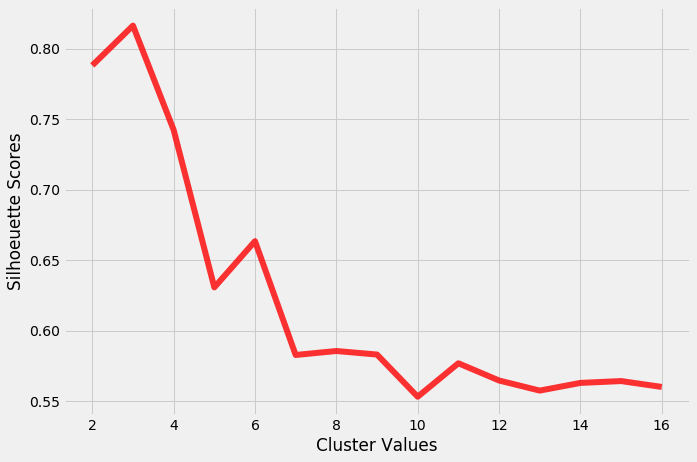

In [60]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    labels = model.labels_
    score = silhouette_score(X, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

Whats the best cluster value?

Elbow method cluster evaluation

In [61]:
#Call interia score on km5

km5.inertia_

5590433389062.8447

["Inertia, or the within-cluster sum of squares criterion (SSE), can be recognized as a measure of how internally coherent clusters are."](http://scikit-learn.org/stable/modules/clustering.html)

We're going to plot a range of cluster values versus the inertia score in order to determine the best cluster value using the "elbow method."

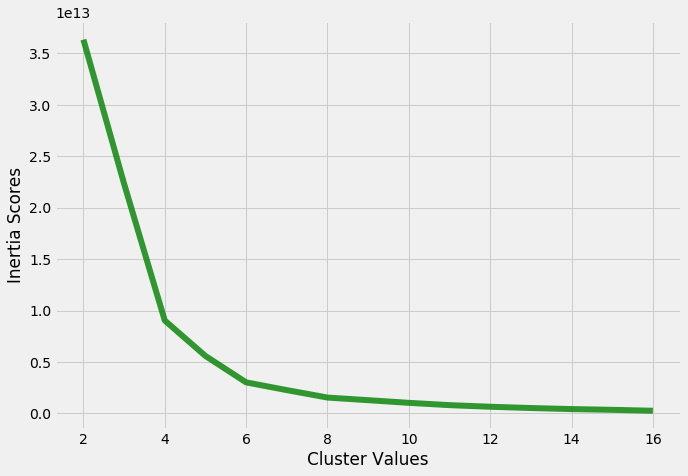

In [62]:
#Intialize range of cluster values from 2 to 16

cluster_range = range(2, 17)
#Intialize list to store inertia scores

i_scores = []

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

Where is the "elbow" in this chart? The elbow is where the best K value lies. (4)

Imagine the line as an arm.

Increasing K is always going to decrease the SSE, but what's the point of using a KMeans algorithm with 1000 K-value algorithm on a 1000 row dataset.

We want to choose a K that's at the beginning of the diminishing margin of returns.

### Scaling features and KMeans

We're going to demonstrate the need for scaling by clustering the data with all of the attributes

In [64]:
#Reassign X

X = df.copy()

Cluster with k = 3

In [63]:
#Intialize kmeans with 3 clusters and random_state = 10
km3 = KMeans(n_clusters=3, random_state=10)

#Fit model
km3.fit(X)

#Generate labels

labs3 = km3.labels_

#Value_counts
pd.value_counts(labs3)


0    154
1      4
2      1
dtype: int64

In [65]:
#Silhouette score
silhouette_score(X, labs3)

0.81645134382385731

You can't really say that there are clusters here. Two-thirds of the clusters only account for 3 percent of the data. This is evidence of outliers skewing the dataset. So even though, we're producing a high silhouette score, this isn't much of a cluster analysis

Let's go ahead and scale the data and refit a clustering algorithm

In [66]:
#Intialize scaler
ss = StandardScaler()

#Fit and transform scaler on data
Xs = ss.fit_transform(X)

#Intialize kmeans with 3 clusters and random_state = 10
km3_s = KMeans(n_clusters=3, random_state=10)

#Fit model
km3_s.fit(Xs)

#Generate labels

labs3_s = km3_s.labels_

#Value_counts
pd.value_counts(labs3_s)


0    85
1    49
2    25
dtype: int64

In [67]:
#Score
silhouette_score(Xs, labs3_s)


0.25321740998862935

Let's go ahead and look at some of the countries in each cluster.

We're going randomly pick 10 countries from each cluster (0, 1, 2)

In [68]:
#Create dataframe with countries as indices and use labs3_s as the values

country_labels = pd.DataFrame(index=df.index, data=labs3_s, columns=["cluster"])

country_labels.head()


,cluster
CountryName,
Afghanistan,1
Albania,0
Algeria,0
Angola,1
Argentina,0


In [82]:
#Cluster 0 developing-- Second world

country_labels[country_labels.cluster == 0].sample(n=10).index

Index([u'Romania', u'China', u'Kazakhstan', u'Brazil', u'Tajikistan',
       u'Bosnia and Herzegovina', u'Dominican Republic', u'Saudi Arabia',
       u'Venezuela, RB', u'Jamaica'],
      dtype='object', name=u'CountryName')

In [79]:
#Cluster 1 + Undervelop -- Third world

country_labels[country_labels.cluster == 1].sample(n=10).index

Index([u'Niger', u'Burundi', u'Tanzania', u'Gambia, The', u'Cote d'Ivoire',
       u'Liberia', u'Haiti', u'Mali', u'Malawi', u'Guinea-Bissau'],
      dtype='object', name=u'CountryName')

In [80]:
#Cluster 2 Develioped  -First World
country_labels[country_labels.cluster == 2].sample(n=10).index

Index([u'United Kingdom', u'Qatar', u'United States', u'Germany', u'Japan',
       u'Norway', u'Switzerland', u'Italy', u'Netherlands', u'Korea, Rep.'],
      dtype='object', name=u'CountryName')

Let's make validation curves using both silhoeutte and inertia scores

Sihouette Score Plot:

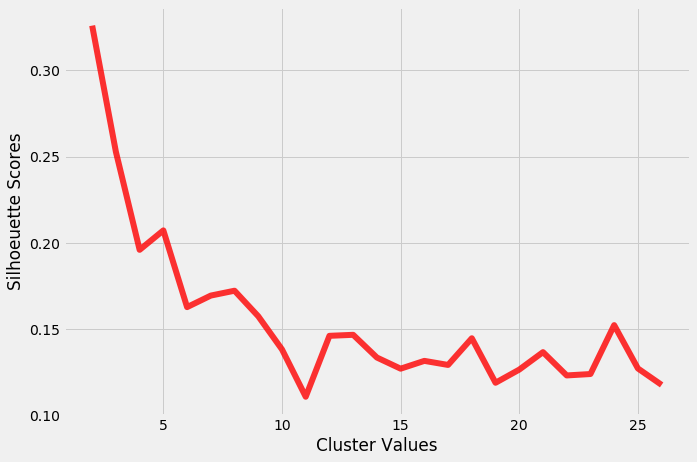

In [84]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 27)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    labels = model.labels_
    score = silhouette_score(Xs, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

Inertia Scores Plot:

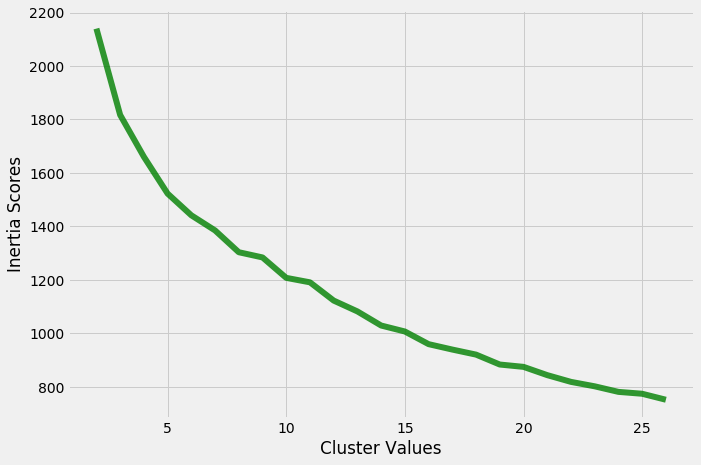

In [85]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 27)

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

What's the ideal number of clusters? Which plot should we use to determine that ?

In [ ]:
countrya =[50000, 80]
countryb =[10000, 66]

countryx = [14000, 76]


In [88]:
np.sqrt((50000-140000)**2+(80-76)**2)

90000.00008888889

In [89]:
np.sqrt((50000-140000)**2+(60-76)**2)

90000.001422222209

**The hardest part of clustering is that it's hard to find the right answers!!**

# Resources:

**Kmeans:**

- https://kapilddatascience.wordpress.com/2015/09/06/introduction-to-k-means-clustering-part-1/
- http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
- Great code walk through of clustering project:https://github.com/net70/KMeans-Clustering---Scikit-Learn/blob/master/KMeans%20Clustering%20-%20Scikit-Learn.ipynb
- My favorite tutorial: https://www.datascience.com/blog/k-means-clustering
- Really like this too: https://github.com/YuChunLOL/kmeans-dbscan-tutorial/blob/master/tutorial_and_labs/clustering-tutorial.ipynb


## Other types of clustering

**Hierarchical/Agglomerative**

- https://onlinecourses.science.psu.edu/stat505/node/143
- https://www.youtube.com/watch?v=XJ3194AmH40
- http://uc-r.github.io/hc_clustering (In R, but still a good resource)
- http://people.revoledu.com/kardi/tutorial/Clustering/index.html
- https://www.coursera.org/learn/cluster-analysis/lecture/LYX9a/4-2-agglomerative-clustering-algorithms
- https://blog.biolab.si/2015/12/02/hierarchical-clustering-a-simple-explanation/

**DBScan**

- https://blog.dominodatalab.com/topology-and-density-based-clustering/
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- https://www.slideshare.net/ssakpi/density-based-clustering

# In Class Lab

For the rest of class, I want you to work on clustering a dataset.

- I recommend picking any of the following datasets:
    - amazon_cities_data.csv, fifa_data.csv, mushrooms.csv, spotify_data.csv, Pokemon.csv, world-happiness-report folder, acs2015_county_data.csv, nba_player_stats.csv, diamonds.csv.
    - You can also use any of other supervised learning datasets we've used, just make sure to remove the target variable.
    
- Determine the right number of clusters using both silhouette score and elbow methods. Cluster using both scaled and unscaled versions of the data.

- Use EDA to learn about your clusters. Visualize the differences between thems. Don't just use the avearage attributes of each cluster's attributes.

- At the end of the class, each one of use will take 2-3 minutes to explain their clustering. Tell us what dataset you chose, how many clusters there are, and briefly describe the characteristics of each cluster.